In [1]:
import os
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
#os.getenv('OPENAI_API_KEY')

#

### OpenAI Chat API

In [4]:
import json
from openai import OpenAI

In [5]:
client = OpenAI()

In [6]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {
            "role": "user",
            "content": "Who won first cricket worldcup?",
        }
    ]
)

In [7]:
print(response.choices[0].message.content)

The West Indies won the first Cricket World Cup in 1975.


Check tokens calculation [https://platform.openai.com/tokenizer](https://platform.openai.com/tokenizer)

Check Pricing for tokens [https://openai.com/api/pricing/](https://openai.com/api/pricing/)

#

### Grammar correction

In [8]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {
      "role": "system",
      "content": "You will be provided with statements, and your task is to convert them to standard English."
    },
    {
      "role": "user",
      "content": "She no went to the market."
    }
  ],
  temperature=0.7,
  max_tokens=64,
)

response.choices[0].message.content

'She did not go to the market.'

#

### Emoji Translation

In [9]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {
      "role": "system",
      "content": "You will be provided with text, and your task is to translate it into emojis. Do not use any regular text. Do your best with emojis only."
    },
    {
      "role": "user",
      "content": "Artificial intelligence is a technology with great promise."
    }
  ],
  temperature=0.8,
  max_tokens=64,
)
print(response.choices[0].message.content)

🤖🧠👍🏼


#

### Explain code

In [10]:
response = client.chat.completions.create(
  model="gpt-4",
  messages=[
    {
      "role": "system",
      "content": "You will be provided with a piece of code, and your task is to explain it in a concise way."
    },
    {
      "role": "user",
      "content": "build: image: python:alpine script: - python --version"
    }
  ],
  temperature=0.7,
  max_tokens=64,
)
print(response.choices[0].message.content)

This code is a configuration for a CI/CD (Continuous Integration/Continuous Deployment) system, likely in a .yml or .yaml format. It defines a build stage for a pipeline.

- `image: python:alpine` specifies that the Docker image to be used for this stage of the pipeline is `


#

### Interview questions

In [11]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {
      "role": "user",
      "content": "Create a list of 5 questions for an interview with a Python Lead."
    }
  ],
  temperature=0.5,
  max_tokens=64,
)
print(response.choices[0].message.content)

1. Can you describe a project you led using Python and how you approached managing the team and ensuring successful delivery?
2. How do you stay current with Python best practices and new technologies in the industry?
3. How do you approach mentoring and coaching junior developers in your team to improve their Python skills and overall performance?



#

### Image Explanation

#### Images are made available to the model in two main ways:
1) by passing a link to the image
2) by passing the base64 encoded image directly in the request. 

#

### Image as URL

In [12]:
image_url = "https://unsplash.com/photos/zwd435-ewb4/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8NXx8Z2VuZXJhdGl2ZSUyMGFpfGVufDB8MXx8fDE3MjE5MTE4NDV8Mg&force=true&w=640"
from IPython.display import Image
Image(url= image_url, width=400)

In [13]:
prompt = [
            {
                "type": "text",
                "text": "Can you explain this image to me"
            }
        ]

image_content = {
                    "type": "image_url",
                    "image_url": { "url": image_url}
                }
prompt.append(image_content)

print(prompt)

[{'type': 'text', 'text': 'Can you explain this image to me'}, {'type': 'image_url', 'image_url': {'url': 'https://unsplash.com/photos/zwd435-ewb4/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8NXx8Z2VuZXJhdGl2ZSUyMGFpfGVufDB8MXx8fDE3MjE5MTE4NDV8Mg&force=true&w=640'}}]


In [14]:
response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": prompt
    }
  ]
)

print(response.choices[0].message.content)

This image depicts a humanoid robot sitting on a wooden bench. The robot has a white, human-like face and head but its torso, arms, and legs are composed of mechanical parts, wires, and joints, making the inner workings visible. It appears to be looking at or interacting with a tablet or some sort of screen device that it is holding in its hands. The background features an outdoor scene with grass and some kind of roofing material or tiles laid out on the ground. The robot is seated indoors, next to a large window, providing a clear view of the outdoor area.


#

### Image as base64 encoded

In [15]:
import base64
import requests

# encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "static/image.jpg"

# Getting the base64 string
base64_image = encode_image(image_path)

prompt = [
            {
                "type": "text",
                "text": "Can you explain this image to me"
            }
        ]

image_url = "https://unsplash.com/photos/zwd435-ewb4/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8NXx8Z2VuZXJhdGl2ZSUyMGFpfGVufDB8MXx8fDE3MjE5MTE4NDV8Mg&force=true&w=640"
image_content = {
                    "type": "image_url",
                    "image_url": { "url": f"data:image/jpeg;base64,{base64_image}"}
                }
prompt.append(image_content)



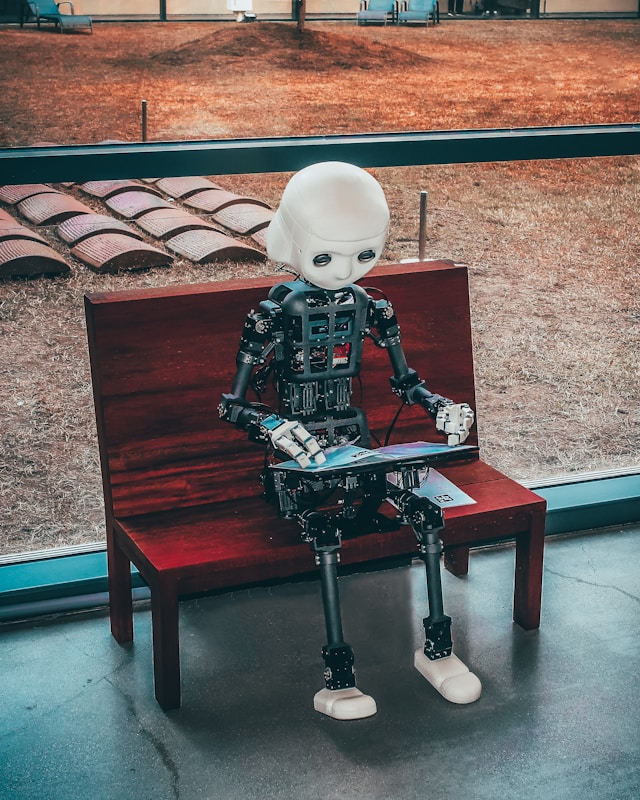

In [16]:
image_url = f"data:image/jpeg;base64,{base64_image}"
from IPython.display import Image 
Image(url= image_url, width=400)

In [17]:
response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": prompt
    }
  ],
  temperature=0.5,
  max_tokens=64,
)
print(response.choices[0].message.content)

This image depicts a humanoid robot sitting on a wooden bench. The robot has a white, human-like head with facial features such as eyes, but its body is mechanical and exposed, showing various components like joints, wires, and metal structures. The robot appears to be holding a tablet or a similar device in its hands


#

### Context Window

In [18]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    max_tokens=50,
    n=1,
    temperature=0.5,
    messages=[
        {
            "role": "user",
            "content": "Who won first cricket worldcup?",
        }
    ]
)
response.choices[0].message.content

'The West Indies cricket team won the first Cricket World Cup in 1975.'

In [19]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    max_tokens=50,
    n=1,
    temperature=0.5,
    messages=[
        {
            "role": "user",
            "content": "Who was the captain of winning team?",
        }
    ]
)
response.choices[0].message.content

'The captain of the winning team was [insert name].'

#

#### That is why chat api accepts messages as list of messages to have more context

In [20]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    max_tokens=50,
    n=1,
    temperature=0.5,
    messages=[
        {
            "role": "user",
            "content": "Who won first cricket worldcup?",
        },
        {
            "role": "user",
            "content": "Who was the captain of winning team?",
        }
    ]
)
response.choices[0].message.content

'The first Cricket World Cup was won by the West Indies in 1975. The captain of the winning team was Clive Lloyd.'